In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plot_utils as pu
from sklearn.manifold import TSNE
import numpy as np
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

/home/maximos/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
val_dir = '/mnt/ssd2/maximos/data/hooktheory_midi_hr/CA_test'
parent_dir_idioms = '/mnt/ssd2/maximos/data/coinvent_midi'
other_dirs = os.listdir(parent_dir_idioms)
idiom_dirs = [f for f in other_dirs if '.pickle' not in f]

In [3]:
# full_dirs = []
full_dirs = [val_dir]
for d in tqdm(idiom_dirs):
    full_dirs.append(os.path.join(parent_dir_idioms, d))

100%|██████████| 32/32 [00:00<00:00, 667749.89it/s]


In [4]:
idiom_ids = []
lstm_embeds = []
matrix_embeds = []
bot_embeds = []
graph_embeds = []

for i, idiom in enumerate(full_dirs):
    print(idiom)
    lstm_np = pu.get_lstm_embeddings_for_data_path(idiom)
    lstm_embeds.append(lstm_np)
    matrix_np = pu.get_matrix_embeddings_for_data_path(idiom)
    matrix_embeds.append(matrix_np)
    bot_np = pu.get_bot_embeddings_for_data_path(idiom)
    bot_embeds.append(bot_np)
    graph_np = pu.get_graph_embeddings_for_data_path(idiom)
    graph_embeds.append(graph_np)
    idiom_ids.append( i*np.ones( (lstm_np.shape[0], 1) ) )

/mnt/ssd2/maximos/data/hooktheory_midi_hr/CA_test
Loading data file.
Loading data file.
Loading data file.
Loading data file.


100%|██████████| 758/758 [00:00<00:00, 1639.72it/s]

Short sequence:  [6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Short sequence:  [6, 4, 4, 4, 4, 6, 4, 4, 4, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


/mnt/ssd2/maximos/data/coinvent_midi/Tango
Loading data file.
Loading data file.
Loading data file.
Loading data file.


100%|██████████| 12/12 [00:00<00:00, 654.79it/s]

/mnt/ssd2/maximos/data/coinvent_midi/Hindemith


Loading data file.
Loading data file.
Loading data file.
Loading data file.


100%|██████████| 6/6 [00:00<00:00, 1415.16it/s]

/mnt/ssd2/maximos/data/coinvent_midi/WholeTone
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 4/4 [00:00<00:00, 1778.75it/s]

/mnt/ssd2/maximos/data/coinvent_midi/organum
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 3/3 [00:00<00:00, 578.15it/s]

/mnt/ssd2/maximos/data/coinvent_midi/ChoralNeoclassicalNeotonal
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 4/4 [00:00<00:00, 780.99it/s]

/mnt/ssd2/maximos/data/coinvent_midi/Whitacre
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 3/3 [00:00<00:00, 1940.31it/s]

/mnt/ssd2/maximos/data/coinvent_midi/modalChorales
Loading data file.


Loading data file.
Loading data file.
Loading data file.


100%|██████████| 28/28 [00:00<00:00, 795.71it/s]

/mnt/ssd2/maximos/data/coinvent_midi/Octatonic
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 7/7 [00:00<00:00, 893.22it/s]

/mnt/ssd2/maximos/data/coinvent_midi/epirus
Loading data file.


Loading data file.
Loading data file.
Loading data file.


100%|██████████| 29/29 [00:00<00:00, 592.34it/s]

/mnt/ssd2/maximos/data/coinvent_midi/ParallelChromatic
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 7/7 [00:00<00:00, 1277.64it/s]

/mnt/ssd2/maximos/data/coinvent_midi/DiatonicModalityPandiatonic


Loading data file.
Loading data file.
Loading data file.
Loading data file.


100%|██████████| 10/10 [00:00<00:00, 584.48it/s]

/mnt/ssd2/maximos/data/coinvent_midi/BossaNova
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 3/3 [00:00<00:00, 863.03it/s]

/mnt/ssd2/maximos/data/coinvent_midi/ChordsAddedNotes
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 3/3 [00:00<00:00, 3421.13it/s]

/mnt/ssd2/maximos/data/coinvent_midi/GreekLabelet
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 5/5 [00:00<00:00, 330.90it/s]

/mnt/ssd2/maximos/data/coinvent_midi/Secundal
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 4/4 [00:00<00:00, 393.90it/s]

/mnt/ssd2/maximos/data/coinvent_midi/Rebetika
Loading data file.


Loading data file.
Loading data file.
Loading data file.


100%|██████████| 15/15 [00:00<00:00, 714.19it/s]


/mnt/ssd2/maximos/data/coinvent_midi/modal16_17_gen
Loading data file.
Loading data file.
Loading data file.
Loading data file.


100%|██████████| 5/5 [00:00<00:00, 656.59it/s]

/mnt/ssd2/maximos/data/coinvent_midi/Kostka-Payne
Loading data file.


Loading data file.
Loading data file.
Loading data file.


100%|██████████| 41/41 [00:00<00:00, 1542.78it/s]

/mnt/ssd2/maximos/data/coinvent_midi/Bartok


Loading data file.
Loading data file.
Loading data file.
Loading data file.


100%|██████████| 12/12 [00:00<00:00, 256.07it/s]


/mnt/ssd2/maximos/data/coinvent_midi/BachChorales
Loading data file.
Loading data file.
Loading data file.
Loading data file.


100%|██████████| 35/35 [00:00<00:00, 1153.86it/s]

/mnt/ssd2/maximos/data/coinvent_midi/Grieg
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 7/7 [00:00<00:00, 387.18it/s]

/mnt/ssd2/maximos/data/coinvent_midi/GreekConstantinidis
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 19/19 [00:00<00:00, 574.35it/s]


/mnt/ssd2/maximos/data/coinvent_midi/Impressionistic
Loading data file.
Loading data file.
Loading data file.
Loading data file.


100%|██████████| 1/1 [00:00<00:00, 790.93it/s]

/mnt/ssd2/maximos/data/coinvent_midi/Mussorgsky
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 4/4 [00:00<00:00, 788.96it/s]

/mnt/ssd2/maximos/data/coinvent_midi/KostkaPayne
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 41/41 [00:00<00:00, 425.69it/s]


/mnt/ssd2/maximos/data/coinvent_midi/Polychords
Loading data file.
Loading data file.
Loading data file.
Loading data file.


100%|██████████| 3/3 [00:00<00:00, 3809.54it/s]

/mnt/ssd2/maximos/data/coinvent_midi/Jazz
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 27/27 [00:00<00:00, 2125.21it/s]

/mnt/ssd2/maximos/data/coinvent_midi/beatles
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 10/10 [00:00<00:00, 1016.60it/s]

/mnt/ssd2/maximos/data/coinvent_midi/modal16_17_pal
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 5/5 [00:00<00:00, 3309.38it/s]

/mnt/ssd2/maximos/data/coinvent_midi/epirusBassDrone
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 4/4 [00:00<00:00, 900.65it/s]

/mnt/ssd2/maximos/data/coinvent_midi/fauxbourdon
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 5/5 [00:00<00:00, 638.27it/s]

/mnt/ssd2/maximos/data/coinvent_midi/Quartal
Loading data file.
Loading data file.


Loading data file.
Loading data file.


100%|██████████| 3/3 [00:00<00:00, 735.76it/s]


In [5]:
idiom_ids_np = np.vstack(idiom_ids)

In [6]:
lstm_embeds_np = np.vstack(lstm_embeds)
matrix_embeds_np = np.vstack(matrix_embeds)
bot_embeds_np = np.vstack(bot_embeds)
graph_embeds_np = np.vstack(graph_embeds)

In [7]:
print(idiom_ids_np.shape)
print(lstm_embeds_np.shape)
print(matrix_embeds_np.shape)
print(bot_embeds_np.shape)
print(graph_embeds_np.shape)

(1121, 1)
(1121, 64)
(1121, 64)
(1121, 64)
(1121, 64)


In [8]:
lstm_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(lstm_embeds_np)
matrix_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(matrix_embeds_np)
bot_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(bot_embeds_np)
graph_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(graph_embeds_np)

In [9]:
print(lstm_tsne.shape)
print(matrix_tsne.shape)
print(bot_tsne.shape)
print(graph_tsne.shape)

(1121, 2)
(1121, 2)
(1121, 2)
(1121, 2)


In [10]:
def plot_idioms_1(data_tsne, ids_np):
    # Ensure 1D labels
    labels = ids_np.squeeze()

    # Unique styles
    unique_styles = np.unique(labels)
    num_styles = len(unique_styles)

    plt.figure(figsize=(8, 6))

    # Use seaborn color palette
    # palette = sns.color_palette("tab10", num_styles)
    palette = sns.color_palette("hls", num_styles)

    for i, style in enumerate(unique_styles):
        mask = labels == style
        plt.scatter(
            data_tsne[mask, 0],
            data_tsne[mask, 1],
            s=40,
            alpha=0.8,
            color=palette[i],
            label=f"Style {style}"
        )

    plt.title("t-SNE of LSTM Idiom Embeddings")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [11]:
def plot_idioms_2(data_tsne, ids_np, caption=''):
    labels = ids_np.squeeze()

    df = pd.DataFrame({
        "tsne_1": data_tsne[:, 0],
        "tsne_2": data_tsne[:, 1],
        "style": labels
    })

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df,
        x="tsne_1",
        y="tsne_2",
        hue="style",
        palette="hls",
        s=60,
        alpha=0.9
    )

    plt.title(f"t-SNE of {caption} Idiom Embeddings")
    plt.legend(title="Style")
    plt.tight_layout()
    plt.show()


In [12]:
def knn_results(idiom_embeds_np, ids_np):
    X = idiom_embeds_np
    y = ids_np.squeeze()

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=2)

    accuracies = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    print("10-Fold CV Accuracy:")
    print(f"Mean accuracy: {np.mean(accuracies):.4f}")
    print(f"Std: {np.std(accuracies):.4f}")

    # report
    all_preds = []
    all_true = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        all_preds.extend(y_pred)
        all_true.extend(y_test)

    print(classification_report(all_true, all_preds))


In [13]:
print('LSTM results')
knn_results(lstm_embeds_np, idiom_ids_np)

LSTM results


/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


10-Fold CV Accuracy:
Mean accuracy: 0.9955
Std: 0.0045


/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       756
         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00         6
         3.0       1.00      1.00      1.00         4
         4.0       1.00      1.00      1.00         3
         5.0       1.00      1.00      1.00         4
         6.0       1.00      0.67      0.80         3
         7.0       1.00      1.00      1.00        28
         8.0       1.00      1.00      1.00         7
         9.0       1.00      1.00      1.00        29
        10.0       1.00      1.00      1.00         7
        11.0       0.91      1.00      0.95        10
        12.0       1.00      1.00      1.00         3
        13.0       1.00      1.00      1.00         3
        14.0       1.00      1.00      1.00         5
        15.0       1.00      1.00      1.00         4
        16.0       1.00      1.00      1.00        15
        17.0       0.83    

/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [14]:
print('Matrix results')
knn_results(matrix_embeds_np, idiom_ids_np)

/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Matrix results
10-Fold CV Accuracy:
Mean accuracy: 0.9991
Std: 0.0027


/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       756
         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00         6
         3.0       1.00      1.00      1.00         4
         4.0       1.00      1.00      1.00         3
         5.0       1.00      1.00      1.00         4
         6.0       1.00      1.00      1.00         3
         7.0       1.00      1.00      1.00        28
         8.0       1.00      1.00      1.00         7
         9.0       1.00      1.00      1.00        29
        10.0       1.00      1.00      1.00         7
        11.0       0.91      1.00      0.95        10
        12.0       1.00      1.00      1.00         3
        13.0       1.00      1.00      1.00         3
        14.0       1.00      1.00      1.00         5
        15.0       1.00      1.00      1.00         4
        16.0       1.00      1.00      1.00        15
        17.0       1.00    

/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [15]:
print('BoT results')
knn_results(bot_embeds_np, idiom_ids_np)

/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


BoT results
10-Fold CV Accuracy:
Mean accuracy: 0.9991
Std: 0.0027


/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       756
         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00         6
         3.0       0.80      1.00      0.89         4
         4.0       1.00      1.00      1.00         3
         5.0       1.00      1.00      1.00         4
         6.0       1.00      1.00      1.00         3
         7.0       1.00      1.00      1.00        28
         8.0       1.00      1.00      1.00         7
         9.0       1.00      1.00      1.00        29
        10.0       1.00      1.00      1.00         7
        11.0       1.00      1.00      1.00        10
        12.0       1.00      1.00      1.00         3
        13.0       1.00      1.00      1.00         3
        14.0       1.00      1.00      1.00         5
        15.0       1.00      1.00      1.00         4
        16.0       1.00      1.00      1.00        15
        17.0       1.00    

/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [16]:
print(graph_embeds_np.shape)

(1121, 64)


In [17]:
print('Graph results')
knn_results(graph_embeds_np, idiom_ids_np)

/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Graph results
10-Fold CV Accuracy:
Mean accuracy: 0.9902
Std: 0.0084


/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       756
         1.0       1.00      1.00      1.00        12
         2.0       0.75      1.00      0.86         6
         3.0       1.00      0.75      0.86         4
         4.0       1.00      0.33      0.50         3
         5.0       1.00      0.50      0.67         4
         6.0       1.00      1.00      1.00         3
         7.0       1.00      1.00      1.00        28
         8.0       1.00      1.00      1.00         7
         9.0       1.00      1.00      1.00        29
        10.0       1.00      1.00      1.00         7
        11.0       1.00      0.90      0.95        10
        12.0       1.00      1.00      1.00         3
        13.0       1.00      1.00      1.00         3
        14.0       1.00      1.00      1.00         5
        15.0       1.00      0.50      0.67         4
        16.0       1.00      1.00      1.00        15
        17.0       1.00    

/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


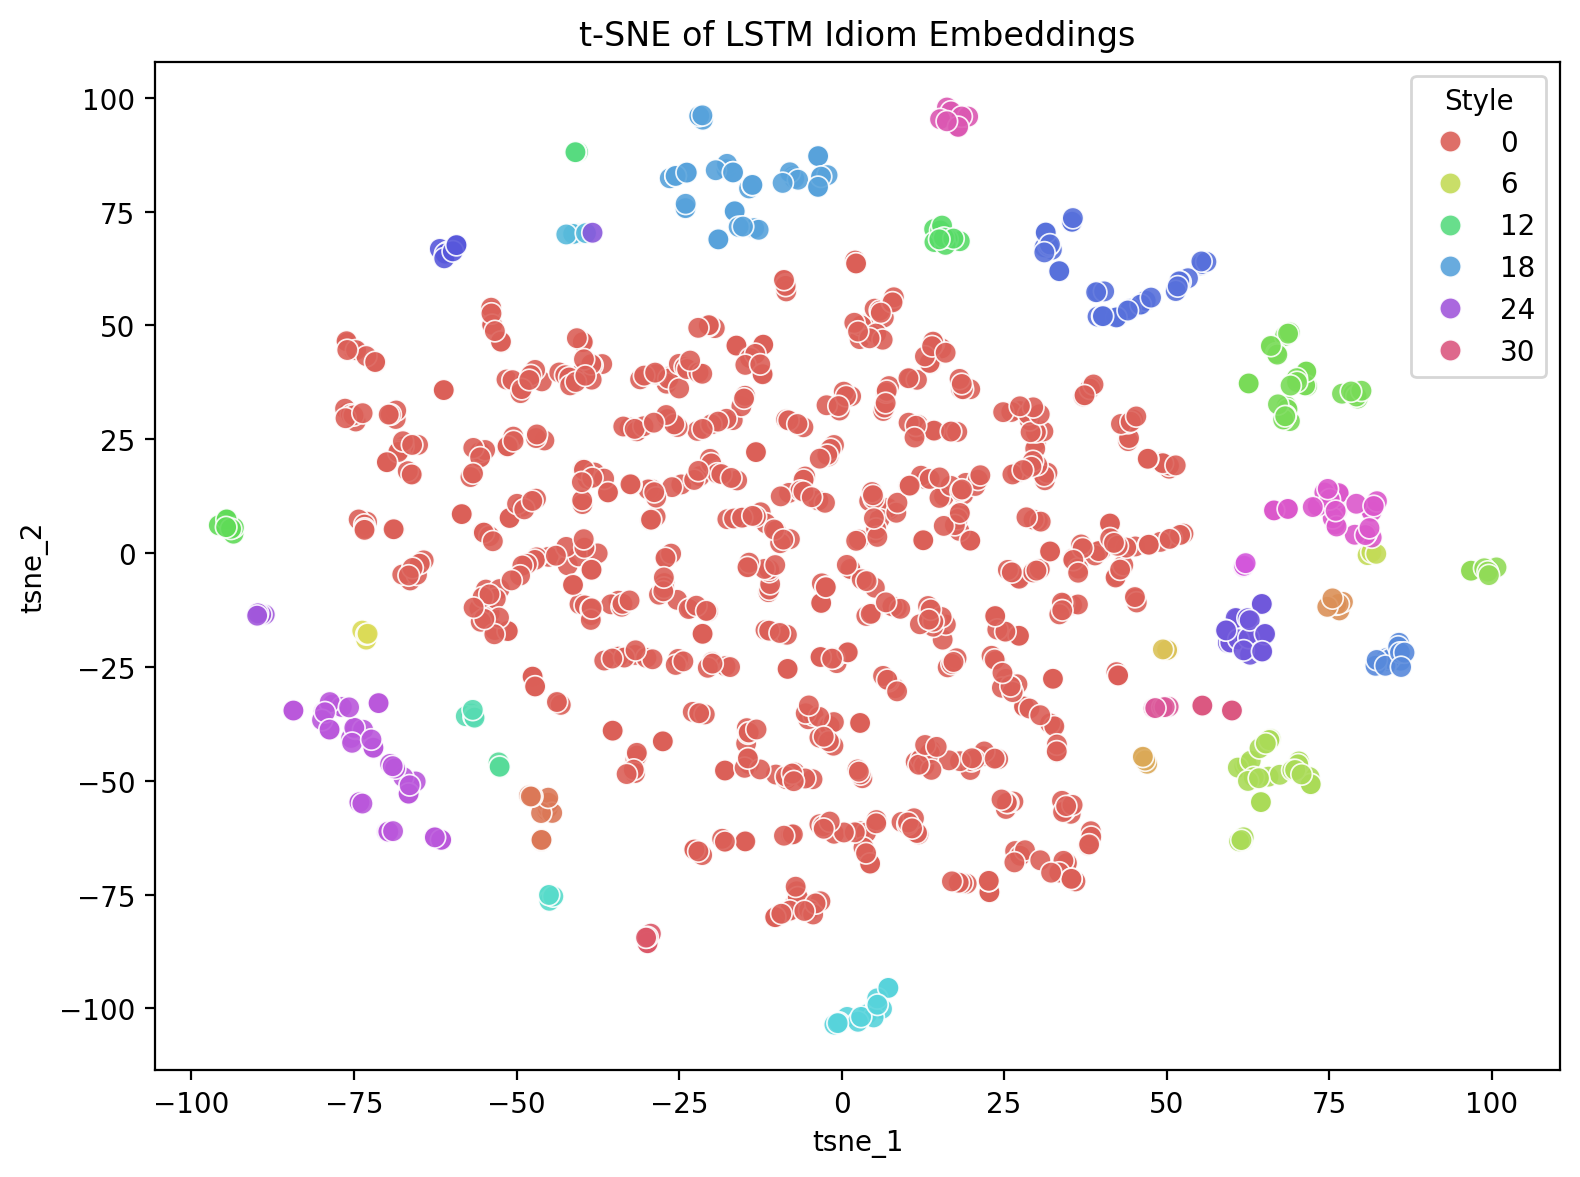

In [18]:
plot_idioms_2(lstm_tsne, idiom_ids_np, 'LSTM')

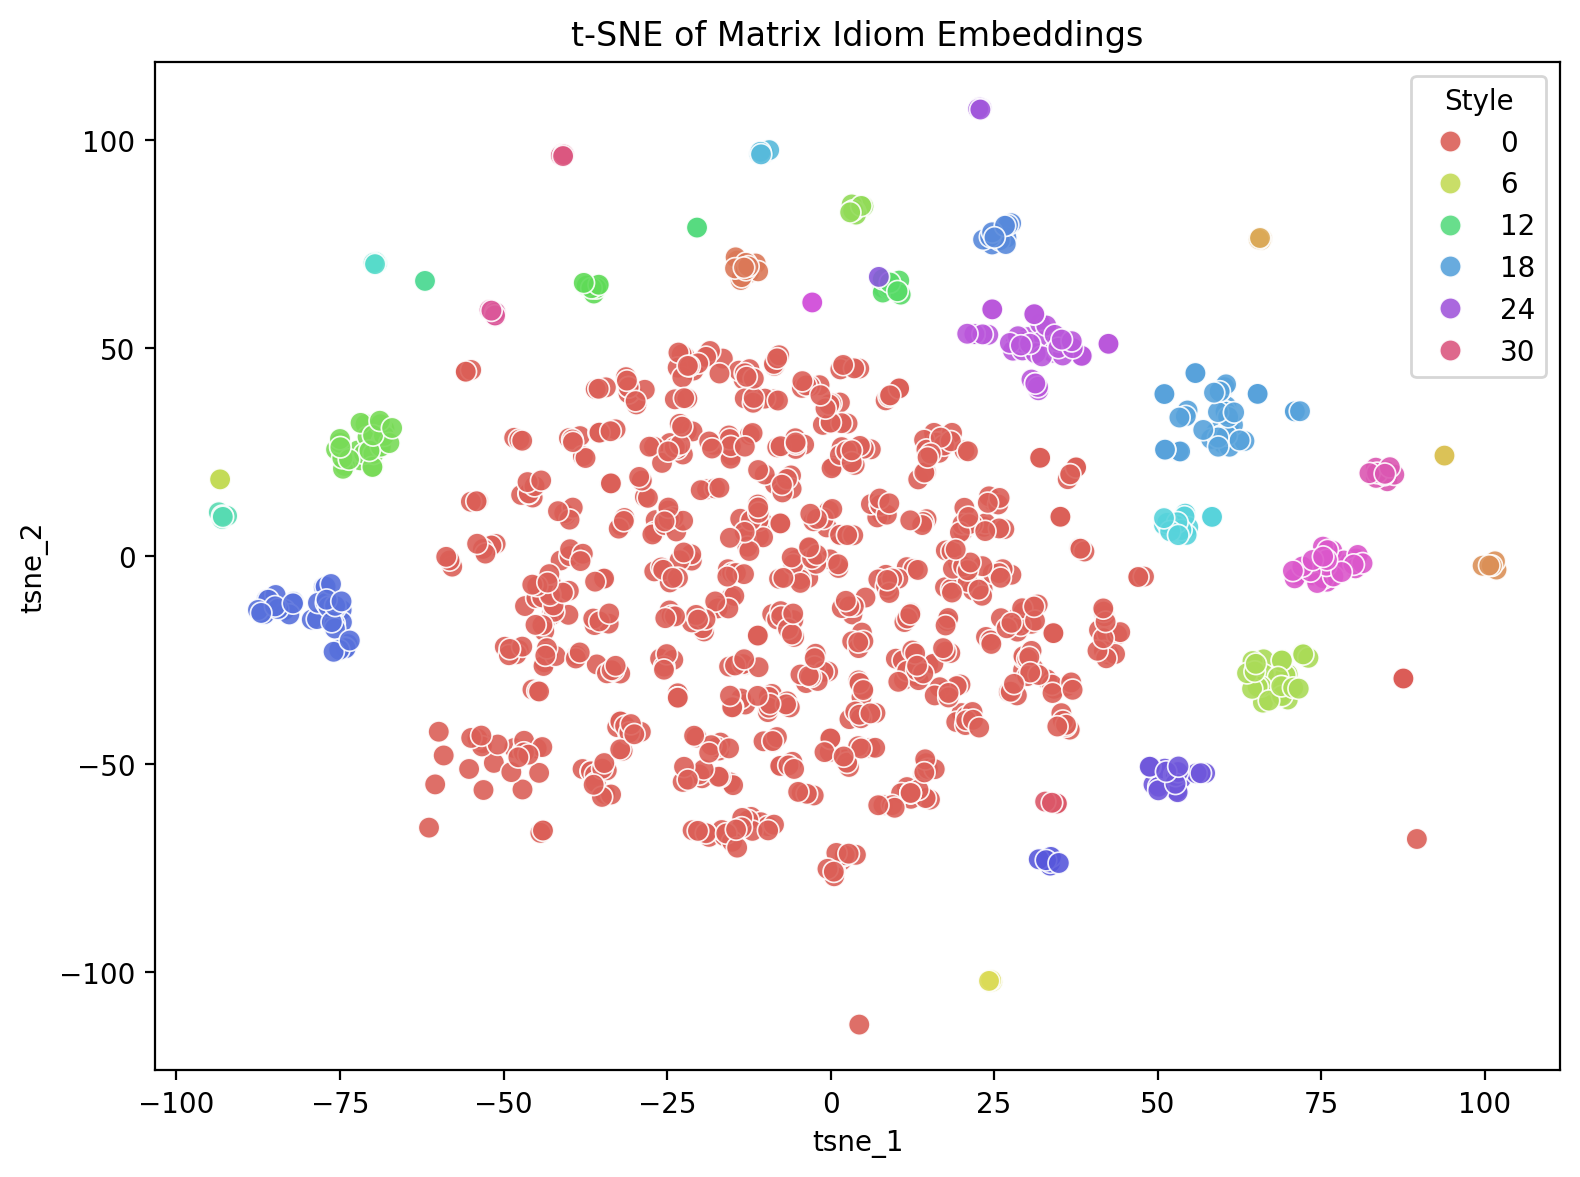

In [19]:
plot_idioms_2(matrix_tsne, idiom_ids_np, 'Matrix')

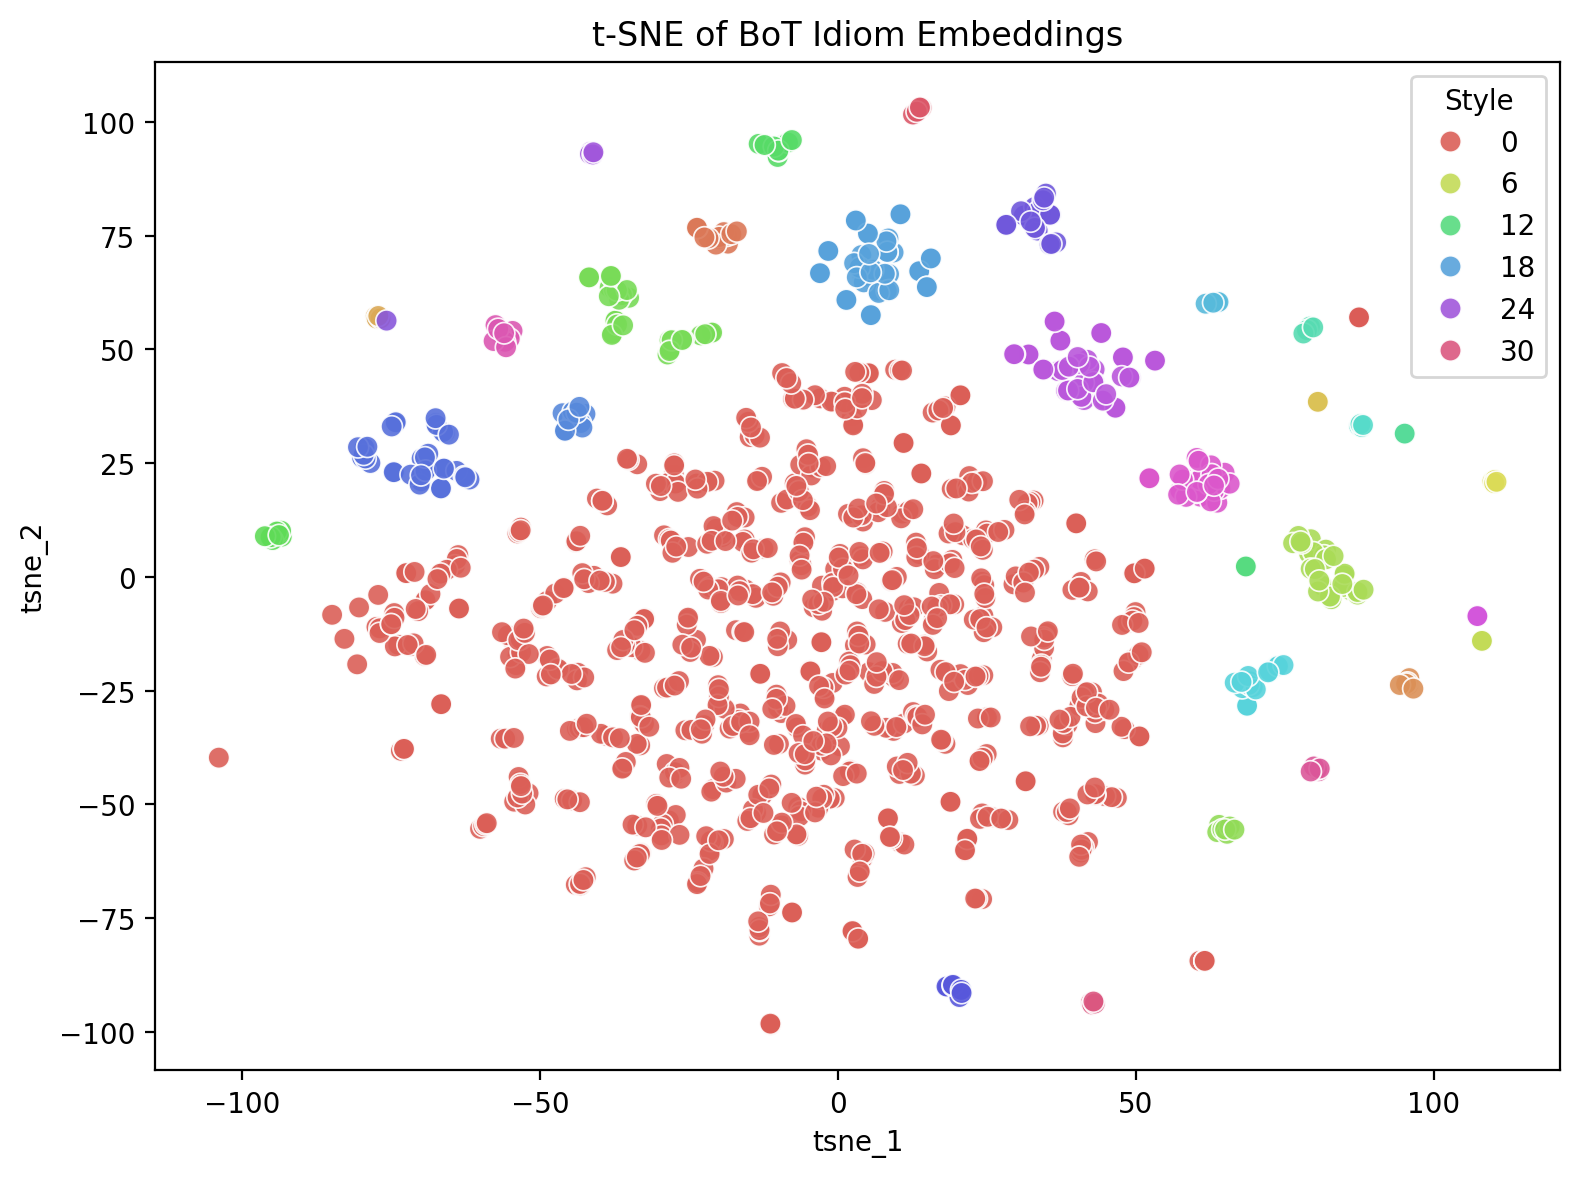

In [20]:
plot_idioms_2(bot_tsne, idiom_ids_np, 'BoT')

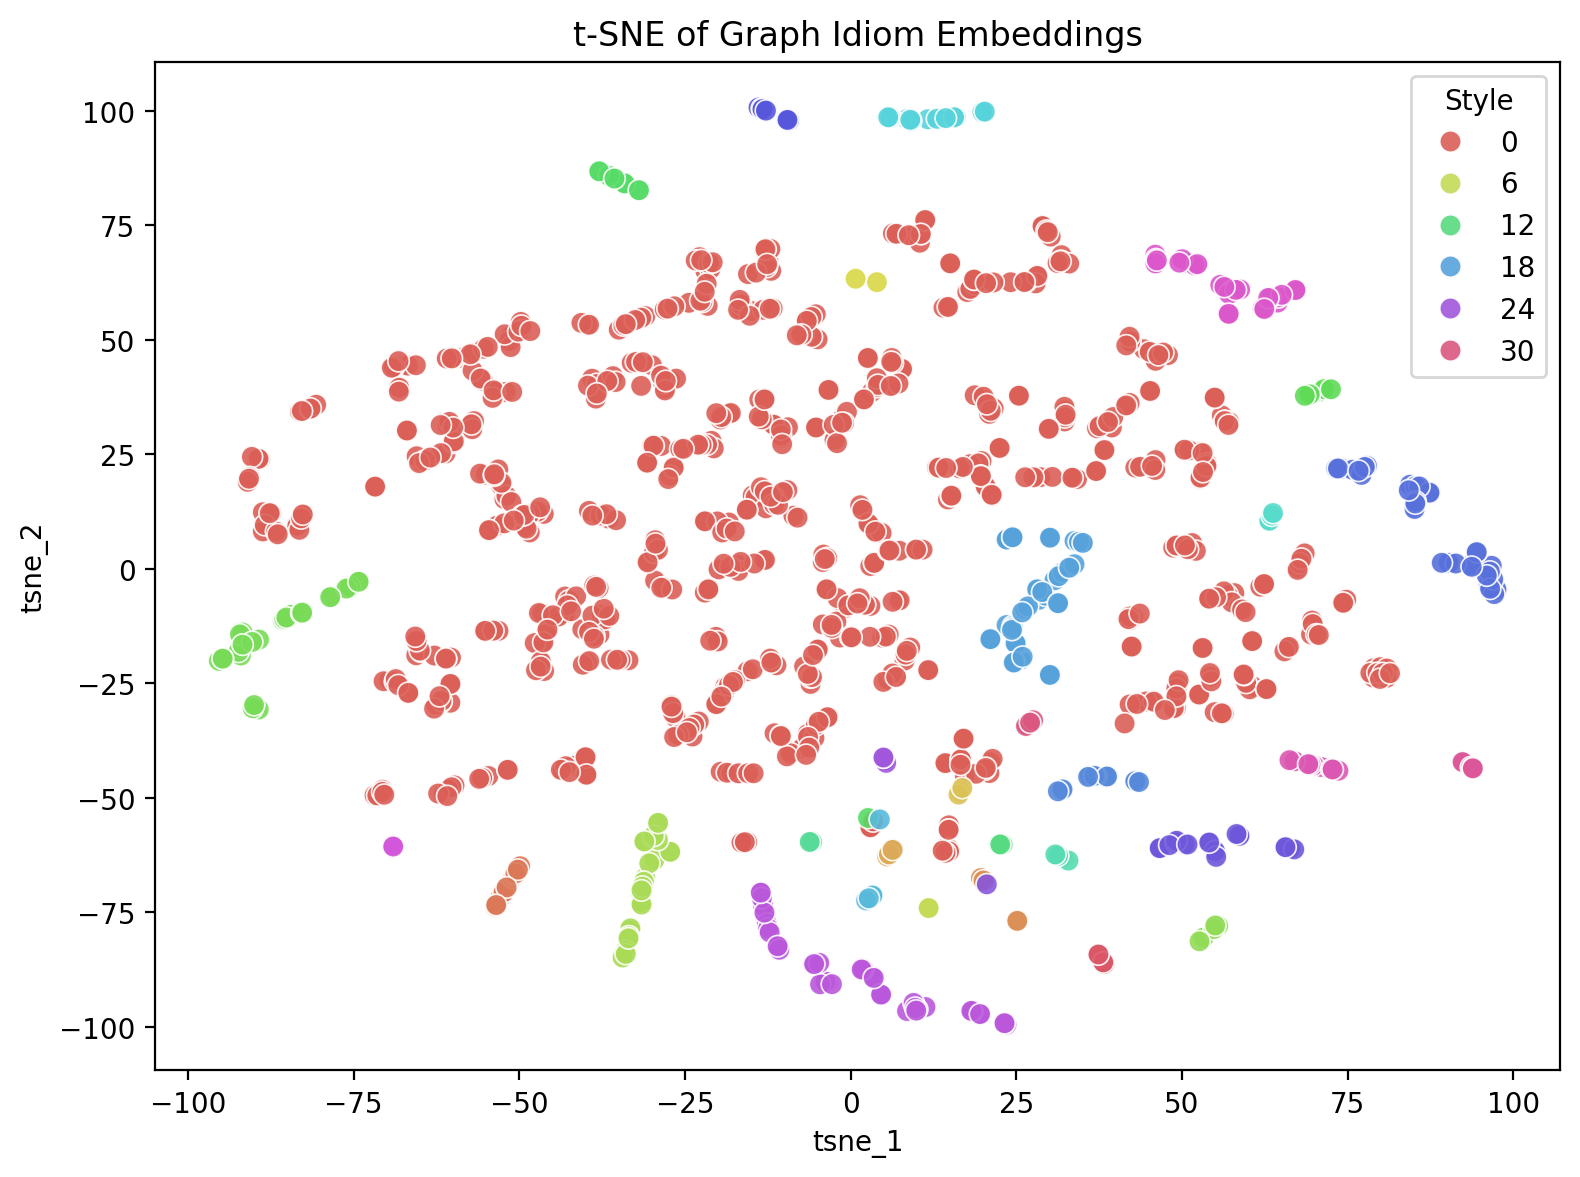

In [21]:
plot_idioms_2(graph_tsne, idiom_ids_np, 'Graph')